In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [2]:
# setting for using Korean
## for Windows
# font_location = "c:/Windows/fonts/malgun.ttf"
# font_name = font_manager.FontProperties(fname = font_location).get_name()
# matplotlib.rc("font", family = font_name)

#for Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# load data1 as 'teenager_crime' and data2 as 'nightlife_crime'
teenager_crime = pd.read_csv("crime_teenager.csv", encoding = "ms949")
nightlife_crime = pd.read_csv ("nightlife_crime.csv", encoding = 'ms949')

In [4]:
# checking the dataset:'teenager_crime' and columns
print ("data info:", teenager_crime.info())

print (teenager_crime["location"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
location         31 non-null object
murder           31 non-null int64
robbery          31 non-null int64
forcible_rape    31 non-null int64
thief            31 non-null int64
violence         31 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.5+ KB
data info: None
['중  부' '종  로' '남대문' '서대문' '혜  화' '용  산' '성  북' '동대문' '마  포' '영등포' '성  동'
 '동  작' '광  진' '서  부' '강  북' '금  천' '중  랑' '강  남' '관  악' '강  서' '강  동'
 '종  암' '구  로' '서  초' '양  천' '송  파' '노  원' '방  배' '은  평' '도  봉' '수  서']


location: 지역구명, murder: 살인, robbery: 강도, forcible_rape: 강간, thief: 절도, violence: 폭행

In [5]:
teenager_crime.head()

,location,murder,robbery,forcible_rape,thief,violence
0,중 부,0,0,1,44,42
1,종 로,0,3,4,34,57
2,남대문,0,0,0,43,4
3,서대문,0,4,5,142,103
4,혜 화,0,2,2,38,29


In [6]:
# checking the dataset:'nightlife_crime' and columns
print ("data info:", nightlife_crime.info())

print (nightlife_crime["region"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
region               25 non-null object
pub                  25 non-null int64
karaoke              25 non-null int64
tot_nightlife        25 non-null int64
murder               25 non-null int64
robbery              25 non-null int64
forcible_rape        25 non-null int64
thef                 25 non-null int64
violence             25 non-null int64
murder_tot           25 non-null int64
robbery_Tot          25 non-null int64
forcible_rape_Tot    25 non-null int64
thef_tot             25 non-null int64
violence_Tot         25 non-null int64
dtypes: int64(13), object(1)
memory usage: 2.8+ KB
data info: None
['강남' '강동' '강북' '강서' '관악' '광진' '구로' '금천' '노원' '도봉' '동대문' '동작' '마포' '서대문'
 '서초' '성동' '성북' '송파' '양천' '영등포' '용산' '은평' '종로' '중구' '중랑']


location: 지역구명, pub: 유흥주점, karaoke: 단란주점, murder: 청소년 살인, robbery: 청소년 강도, forcible_rape: 청소년 강간, thef: 청소년 절도, violence: 청소년 폭행, murder_tot: 살인, robbery_Tot: 강도, forcible_rape_Tot: 강간, thef_tot: 절도, violence_Tot: 폭행

In [7]:
nightlife_crime.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,0,9,67,37,3,15,300,2411,2465
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [8]:
# dataset2: 'nightlife_crime'으로 correlation table 만들기
nightlife_crime.corr()

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
pub,1.000000,0.645022,0.922502,-0.166262,-0.057367,-0.255610,-0.237972,-0.226418,0.072228,0.221281,0.324733,0.291358,0.214815
karaoke,0.645022,1.000000,0.889996,-0.161529,-0.218839,-0.192438,-0.155352,-0.177201,0.205042,0.528627,0.372836,0.314048,0.310810
tot_nightlife,0.922502,0.889996,1.000000,-0.180798,-0.144769,-0.249724,-0.220467,-0.224609,0.146668,0.399055,0.382091,0.332481,0.285174
murder,-0.166262,-0.161529,-0.180798,1.000000,-0.092016,-0.145128,0.019406,-0.108604,0.197589,0.065407,0.077804,0.009438,0.041869
robbery,-0.057367,-0.218839,-0.144769,-0.092016,1.000000,0.043506,0.213832,0.235965,0.146136,-0.109759,-0.003658,0.033759,0.003840
forcible_rape,-0.255610,-0.192438,-0.249724,-0.145128,0.043506,1.000000,0.289158,0.308737,-0.010872,0.151990,0.037597,0.219170,0.113525
thef,-0.237972,-0.155352,-0.220467,0.019406,0.213832,0.289158,1.000000,0.827267,0.514378,0.222466,0.342352,0.491356,0.679691
violence,-0.226418,-0.177201,-0.224609,-0.108604,0.235965,0.308737,0.827267,1.000000,0.561822,0.168012,0.223450,0.344403,0.584180
murder_tot,0.072228,0.205042,0.146668,0.197589,0.146136,-0.010872,0.514378,0.561822,1.000000,0.614302,0.568969,0.644370,0.771440
robbery_Tot,0.221281,0.528627,0.399055,0.065407,-0.109759,0.151990,0.222466,0.168012,0.614302,1.000000,0.659055,0.642022,0.723995


# 가설1. 

## 유흥업소(유흥주점 + 단란주점) 이 많은 지역은 청소년 범죄도 많을 것이다

In [9]:
#dataset2:  nightlife_crime을 이용해서 지역, 유흥업소의 수, 청소년 5대 범죄현황으로만 구성된 dataframe을 만든다
nightlife_teenager_crime = nightlife_crime[['region','tot_nightlife','pub','karaoke','murder','robbery','forcible_rape','thef','violence']]

In [10]:
nightlife_teenager_crime.head()

,region,tot_nightlife,pub,karaoke,murder,robbery,forcible_rape,thef,violence
0,강남,637,283,354,0,0,9,67,37
1,강동,252,146,106,0,3,6,193,158
2,강북,207,79,128,0,0,9,166,210
3,강서,280,113,167,0,3,9,273,240
4,관악,322,223,99,0,2,14,170,209


In [11]:
# 상관계수보기
nightlife_teenager_crime.corr()

,tot_nightlife,pub,karaoke,murder,robbery,forcible_rape,thef,violence
tot_nightlife,1.000000,0.922502,0.889996,-0.180798,-0.144769,-0.249724,-0.220467,-0.224609
pub,0.922502,1.000000,0.645022,-0.166262,-0.057367,-0.255610,-0.237972,-0.226418
karaoke,0.889996,0.645022,1.000000,-0.161529,-0.218839,-0.192438,-0.155352,-0.177201
murder,-0.180798,-0.166262,-0.161529,1.000000,-0.092016,-0.145128,0.019406,-0.108604
robbery,-0.144769,-0.057367,-0.218839,-0.092016,1.000000,0.043506,0.213832,0.235965
forcible_rape,-0.249724,-0.255610,-0.192438,-0.145128,0.043506,1.000000,0.289158,0.308737
thef,-0.220467,-0.237972,-0.155352,0.019406,0.213832,0.289158,1.000000,0.827267
violence,-0.224609,-0.226418,-0.177201,-0.108604,0.235965,0.308737,0.827267,1.000000


--> 전체 지역구의 유흥업소 수와 청소년 범죄는 유의미한 상관관계가 보이지않음

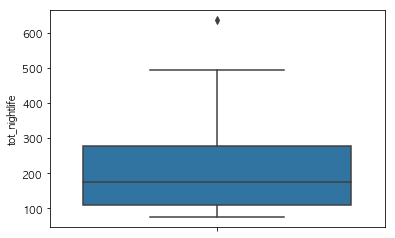

In [12]:
# 유흥업소의 수 boxplot을 이용하여 분포보기
sns.boxplot( y="tot_nightlife", data=nightlife_crime)

In [13]:
# 유흥업소의 수를 기준으로 내림차순으로 지역 나열하기
nightlife_teenager_crime.sort_values (by = ['tot_nightlife'], ascending = False ).head(6)

,region,tot_nightlife,pub,karaoke,murder,robbery,forcible_rape,thef,violence
0,강남,637,283,354,0,0,9,67,37
19,영등포,493,200,293,0,0,6,119,118
22,종로,369,229,140,0,3,4,34,57
23,중구,365,260,105,0,2,3,82,71
4,관악,322,223,99,0,2,14,170,209
3,강서,280,113,167,0,3,9,273,240


In [14]:
# 유흥업소가 많은 상위 6개 지역을 ntc_top6로 새로운 Dataframe으로 저장
ntc_top6 = nightlife_teenager_crime.sort_values (by = ['tot_nightlife'], ascending = False ).head(6)

In [15]:
# 유흥업소가 많은 상위 5개 지역을 ntc_top5로 새로운 Dataframe으로 저장
ntc_top5 = nightlife_teenager_crime.sort_values (by = ['tot_nightlife'], ascending = False ).head()

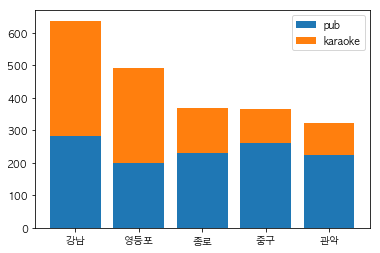

In [16]:
plt.bar( ntc_top5['region'], ntc_top5['pub'], label = 'pub')
plt.bar(ntc_top5['region'], ntc_top5['karaoke'], bottom = ntc_top5['pub'], label = 'karaoke',)

# 기본으로 figure size setting : plt.rcParams['figure.figsize'] = (n,m)
plt.rcParams ['figure.figsize'] = (14, 10)
plt.legend(loc = 'upper right')
fig = plt.gcf()    #gcf:get current figure

# fig.set_size_inches (12, 8) : 위에 기본 세팅있으므로 무시

plt.show()

In [17]:
# 유흥업소가 많은 상위 5개 지역구를 이용하여 유흥업소 수와 청소년 범죄의 상관관계 보기
ntc_top5.corr()

,tot_nightlife,pub,karaoke,murder,robbery,forcible_rape,thef,violence
tot_nightlife,1.000000,0.454420,0.968928,NaN,-0.839432,0.013488,-0.290662,-0.541180
pub,0.454420,1.000000,0.219969,NaN,-0.114279,-0.067360,-0.445665,-0.602676
karaoke,0.968928,0.219969,1.000000,NaN,-0.887536,0.033475,-0.194559,-0.425305
murder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
robbery,-0.839432,-0.114279,-0.887536,NaN,1.000000,-0.184724,-0.195855,0.114545
forcible_rape,0.013488,-0.067360,0.033475,NaN,-0.184724,1.000000,0.735276,0.710206
thef,-0.290662,-0.445665,-0.194559,NaN,-0.195855,0.735276,1.000000,0.933598
violence,-0.541180,-0.602676,-0.425305,NaN,0.114545,0.710206,0.933598,1.000000


--> 총 유흥업소 수와 청소년 강도, 폭행이 높은 음의 상관관계를 보인다

pub의 수 - 청소년 폭행/절도

karaoke의 수 - 청소년 강도/폭행이 높은 음의 상관관계 

절도와 폭행의 높은 범죄간 상관관계

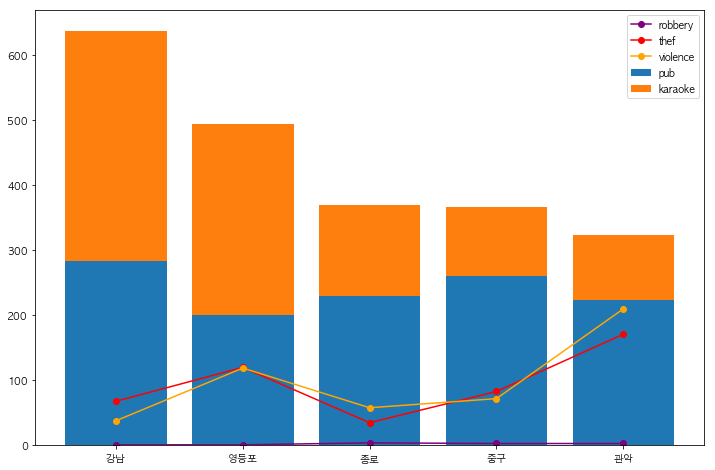

In [18]:
# 시각화해보기

plt.plot (ntc_top5['region'], ntc_top5['robbery'], 
          marker = 'o', markerfacecolor = 'purple', color = 'purple', label = 'robbery')
plt.plot (ntc_top5['region'], ntc_top5['thef'], 
          marker = 'o', markerfacecolor = 'red', color = 'red', label = 'thef')
plt.plot (ntc_top5['region'], ntc_top5['violence'], 
          marker = 'o', markerfacecolor = 'orange', color = 'orange', label = 'violence')
plt.bar (ntc_top5['region'], ntc_top5['pub'], label = 'pub')
plt.bar (ntc_top5['region'], ntc_top5['karaoke'], label = 'karaoke', bottom = ntc_top5['pub'])

plt.legend()
fig = plt.gcf()    #gcf:get current figure
fig.set_size_inches (12, 8)
plt.show()

# 가설2.

## 범죄가 많은 지역은 청소년 범죄도 많을 것이다

In [19]:
# Dataset2: 'nightlife_crime'을 사용하여 지역별 전체 범죄와 청소년 범죄로 구성된 새로운 Dataframe: crime 만들기
crime = nightlife_crime [['region', 'murder' , 'robbery', 'forcible_rape', 'thef', 'violence', 'murder_tot', 'robbery_Tot', 'forcible_rape_Tot', 'thef_tot', 'violence_Tot']]

In [20]:
#Dataset 확인
crime.head()

,region,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,0,0,9,67,37,3,15,300,2411,2465
1,강동,0,3,6,193,158,4,6,156,2366,2712
2,강북,0,0,9,166,210,7,14,153,1434,2649
3,강서,0,3,9,273,240,7,13,262,2096,3207
4,관악,0,2,14,170,209,9,12,320,2706,3298


In [21]:
# 상관계수 확인
crime.corr()

,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
murder,1.000000,-0.092016,-0.145128,0.019406,-0.108604,0.197589,0.065407,0.077804,0.009438,0.041869
robbery,-0.092016,1.000000,0.043506,0.213832,0.235965,0.146136,-0.109759,-0.003658,0.033759,0.003840
forcible_rape,-0.145128,0.043506,1.000000,0.289158,0.308737,-0.010872,0.151990,0.037597,0.219170,0.113525
thef,0.019406,0.213832,0.289158,1.000000,0.827267,0.514378,0.222466,0.342352,0.491356,0.679691
violence,-0.108604,0.235965,0.308737,0.827267,1.000000,0.561822,0.168012,0.223450,0.344403,0.584180
murder_tot,0.197589,0.146136,-0.010872,0.514378,0.561822,1.000000,0.614302,0.568969,0.644370,0.771440
robbery_Tot,0.065407,-0.109759,0.151990,0.222466,0.168012,0.614302,1.000000,0.659055,0.642022,0.723995
forcible_rape_Tot,0.077804,-0.003658,0.037597,0.342352,0.223450,0.568969,0.659055,1.000000,0.733394,0.651931
thef_tot,0.009438,0.033759,0.219170,0.491356,0.344403,0.644370,0.642022,0.733394,1.000000,0.857465
violence_Tot,0.041869,0.003840,0.113525,0.679691,0.584180,0.771440,0.723995,0.651931,0.857465,1.000000


--> 전체 폭력과 청소년 폭력의 높은 상관관계

In [22]:
# datatype 이 object 인 region을 인덱스로 만들어주기 
crime = crime.set_index ('region')

In [23]:
crime.head()

,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
region,,,,,,,,,,
강남,0,0,9,67,37,3,15,300,2411,2465
강동,0,3,6,193,158,4,6,156,2366,2712
강북,0,0,9,166,210,7,14,153,1434,2649
강서,0,3,9,273,240,7,13,262,2096,3207
관악,0,2,14,170,209,9,12,320,2706,3298


In [24]:
# 전체 폭력과 청소년 폭력의 scale 차이로 인해, 시각화가 쉽지않기때문에 scaling을 위해 
# data를 비율로 나타내준다
# scaling : 각 범죄 유형별로 각 지역의 비율로 Dataframe 변경해주기

crime_copy = crime.copy()

for j in (crime.columns) :
    for i in (crime.index):
        crime_copy.loc[i,j] = crime.loc[i,j]/crime[j].sum()

print(crime_copy.head())


        murder   robbery  forcible_rape      thef  violence  murder_tot  \
region                                                                    
강남         0.0  0.000000       0.040359  0.019952  0.011226    0.020548   
강동         0.0  0.065217       0.026906  0.057475  0.047937    0.027397   
강북         0.0  0.000000       0.040359  0.049434  0.063714    0.047945   
강서         0.0  0.065217       0.040359  0.081298  0.072816    0.047945   
관악         0.0  0.043478       0.062780  0.050625  0.063410    0.061644   

        robbery_Tot  forcible_rape_Tot  thef_tot  violence_Tot  
region                                                          
강남         0.058824           0.060508  0.048788      0.041851  
강동         0.023529           0.031464  0.047877      0.046044  
강북         0.054902           0.030859  0.029018      0.044975  
강서         0.050980           0.052844  0.042414      0.054448  
관악         0.047059           0.064542  0.054757      0.055993  


In [25]:
crime_copy.head()

,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
region,,,,,,,,,,
강남,0.0,0.000000,0.040359,0.019952,0.011226,0.020548,0.058824,0.060508,0.048788,0.041851
강동,0.0,0.065217,0.026906,0.057475,0.047937,0.027397,0.023529,0.031464,0.047877,0.046044
강북,0.0,0.000000,0.040359,0.049434,0.063714,0.047945,0.054902,0.030859,0.029018,0.044975
강서,0.0,0.065217,0.040359,0.081298,0.072816,0.047945,0.050980,0.052844,0.042414,0.054448
관악,0.0,0.043478,0.062780,0.050625,0.063410,0.061644,0.047059,0.064542,0.054757,0.055993


In [26]:
# region column을 다시 사용하기 위해 indexing 주고 region을 열로 만들기
crime_copy.reset_index(drop = False, inplace = True)


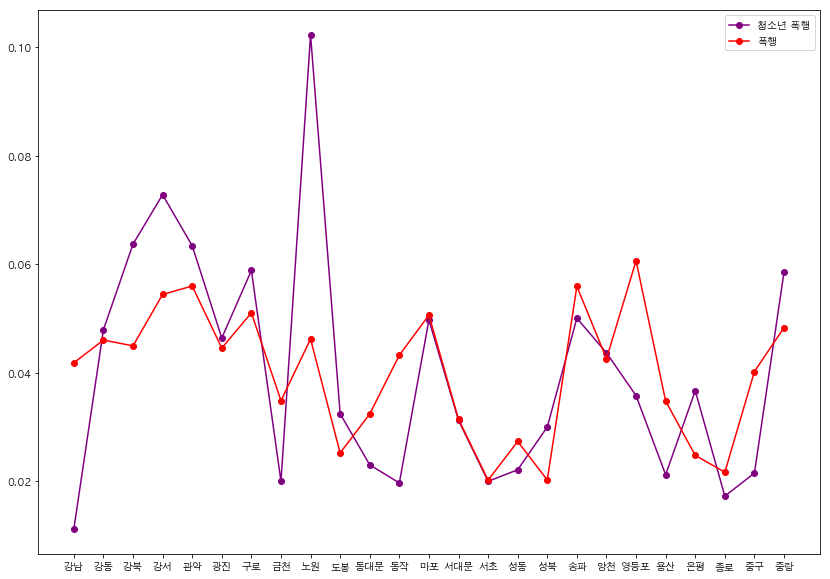

In [27]:
# 전체 폭행과 청소년 폭행의 상관관계를 보기위해 두 항목을 꺾은 선 그래프로 시각화
# crime_copy.index = pd.RangeIndex(len(crime_copy.index))

plt.plot (crime_copy['region'], crime_copy['violence'], label = '청소년 폭행', 
          marker = 'o', markerfacecolor = 'purple', color = 'purple')
plt.plot (crime_copy['region'], crime_copy['violence_Tot'], label = '폭행',
         marker = 'o', markerfacecolor = 'red', color = 'red' )

plt.legend()
plt.show()



위 그래프에서 보이듯 전체 폭행과 청소년 폭행은 높은 상관관계를 보인다

## 참고

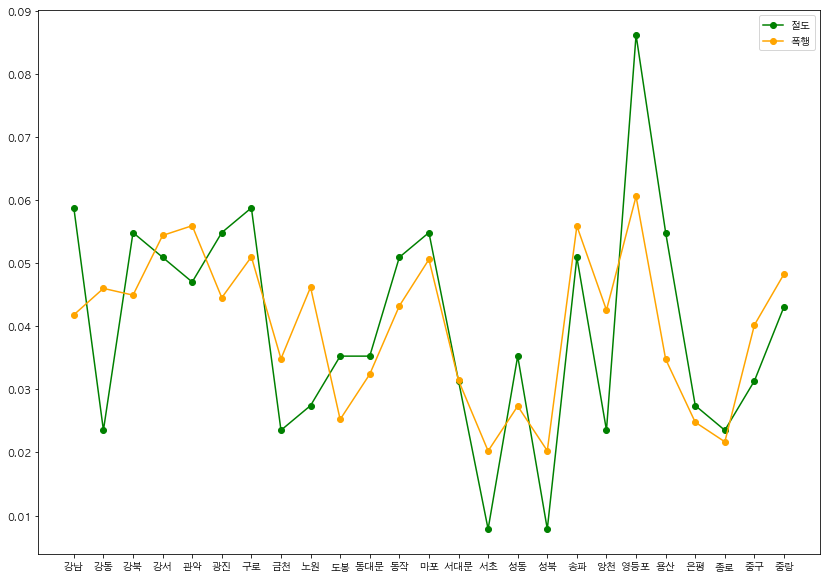

In [28]:
# 시각화와 correlation table을 통해 범죄간 상관관계를 찾음
# 절도-폭행의 상관관계

plt.plot (crime_copy['region'], crime_copy['robbery_Tot'], label = '절도',
         marker = 'o', markerfacecolor = 'green', color = 'green')
plt.plot (crime_copy ['region'], crime_copy['violence_Tot'], label = '폭행',
          marker = 'o', markerfacecolor = 'orange', color = 'orange')

plt.legend ()
plt.show()




범죄간 상관관계: 절도 - 폭행


전체 범죄와 청소년 범죄의 상관관계: 전체 폭행 - 청소년 폭행

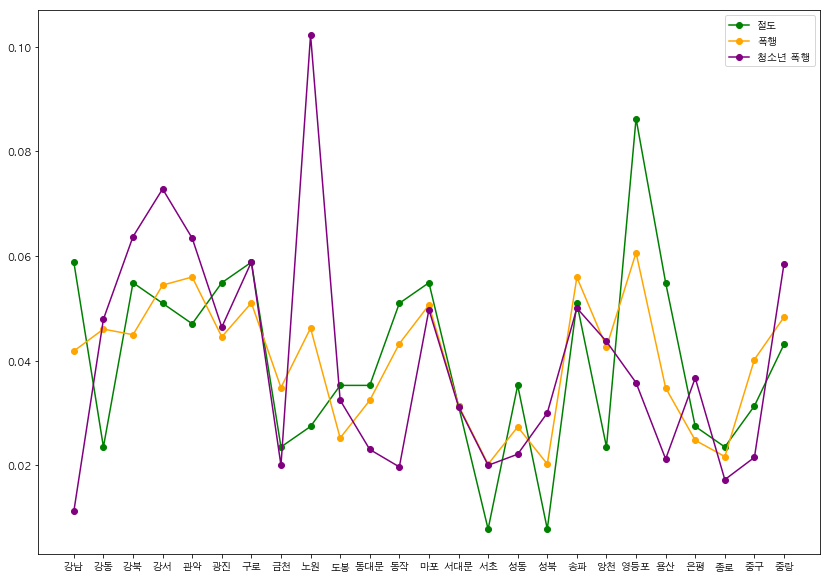

In [29]:


# 절도-폭행-청소년 폭행의 상관관계
plt.plot (crime_copy['region'], crime_copy['robbery_Tot'], label = '절도',
         marker = 'o', markerfacecolor = 'green', color = 'green')
plt.plot (crime_copy ['region'], crime_copy['violence_Tot'], label = '폭행',
          marker = 'o', markerfacecolor = 'orange', color = 'orange')
plt.plot (crime_copy['region'], crime_copy['violence'], label = '청소년 폭행', 
          marker = 'o', markerfacecolor = 'purple', color = 'purple')

plt.legend ()
plt.rcParams ['figure.figsize'] = (15, 8)
plt.show()


